<br> Assignment - Advance Python [Major]   
By :-Nitin Sharma 

In [2]:
# Also, I am considering this assignment as a project in my data science learning path.
# In this project, I was given some questions and I tried to answer them by writing the appropriate code.

In [3]:
# First of all, I imported the important libraries we are going to use with in it. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [44]:
honey = pd.read_csv(r'D:\Projects\honeyproduction 1998-2021.csv')  
# I was given a csv file and I named this as honey and imported it from my local path. 

In [45]:
honey.head(2) # I took overview if any column in not left behind.

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


<br> Now, I performed some basic eda

In [6]:
honey.shape

(985, 8)

In [8]:
honey.describe(include='all')

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,NaN,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,NaN,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,NaN,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,NaN,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000


In [9]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [12]:
honey.isna().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [16]:
honey.nunique()

State           44
numcol         185
yieldpercol     99
totalprod      730
stocks         681
priceperlb     350
prodvalue      915
year            24
dtype: int64

Que 1. How has honey production yield changed from 1998 to 2021?<br>


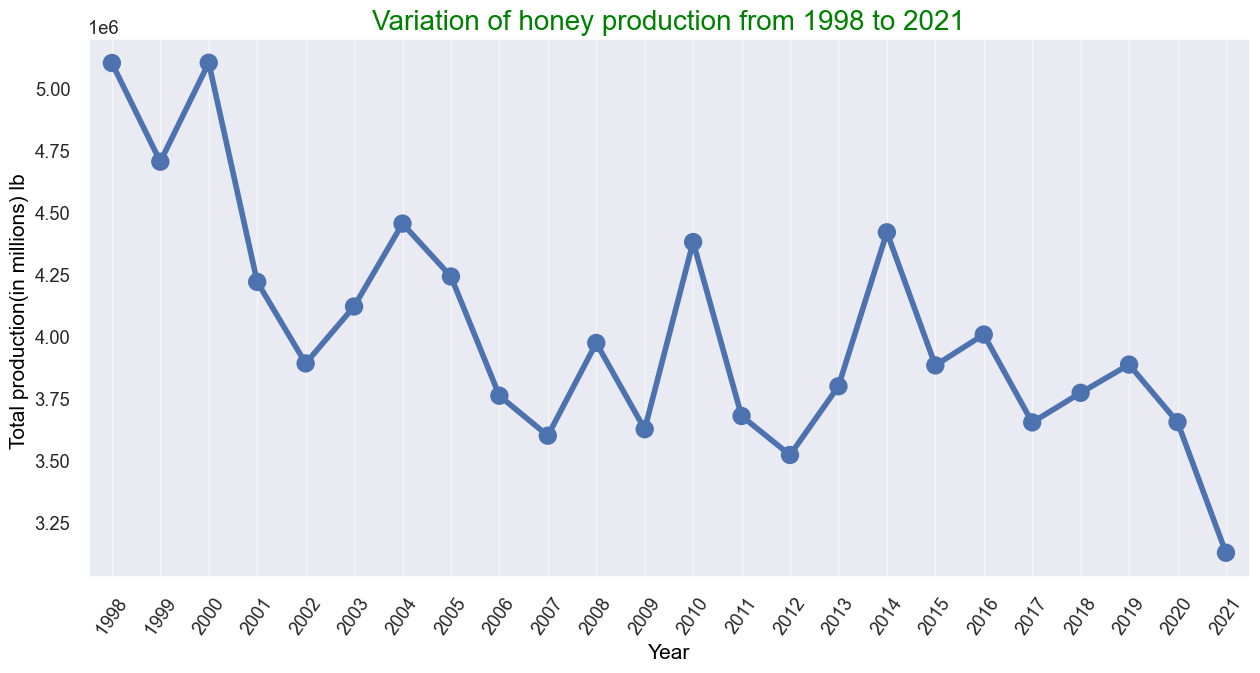

In [19]:
#Ans 1--    Here, we got to know about the varitaion within the time.
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context('talk',font_scale=.8,rc={'grid.linewidth':0.5})
ax=sns.pointplot(data=honey,x='year',y='totalprod',ci=None)
ax.set_title('Variation of honey production from 1998 to 2021',size=20,color='Green')
ax.set_xlabel('Year',size=15,color='black')
ax.set_ylabel('Total production(in millions) lb ',size=15,color='black')
# ax.set_ylim(20000,50000)
plt.xticks(rotation=55)
plt.grid()
plt.show()

In [20]:
# creating a differnet dataset 
honey1=honey[['year','totalprod']]

In [27]:
# Reducing total production value to some extent
honey1['totalprod']=honey1['totalprod']/1000

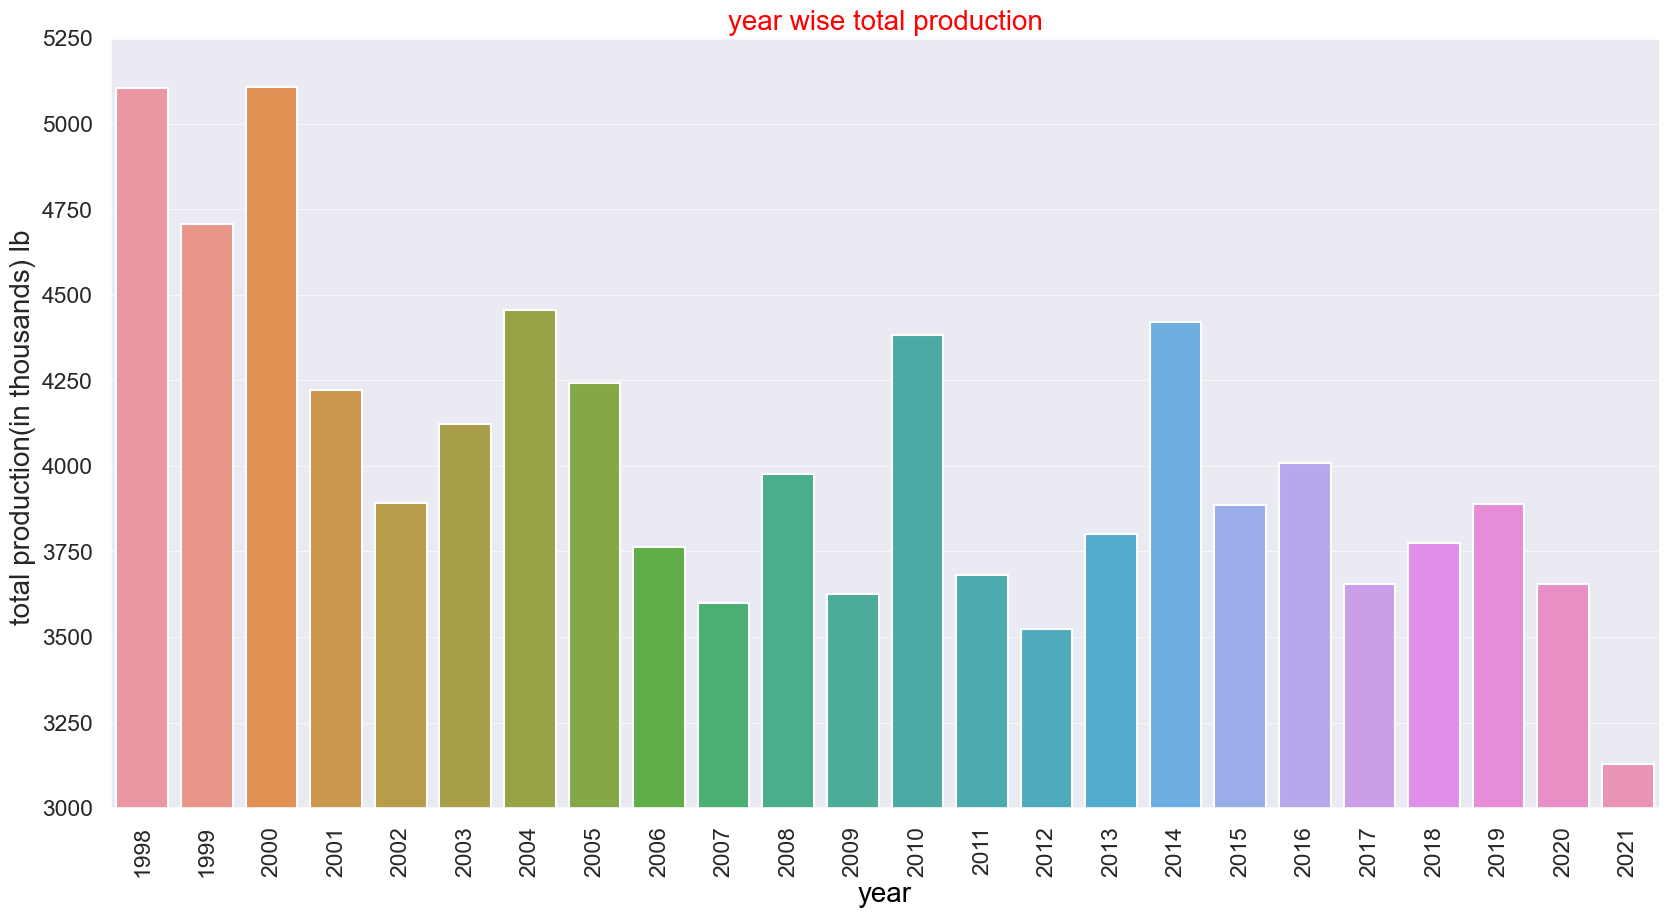

In [31]:
# here, we got to know about prdouction about year wise in time 
# we used the barplot to visualise the data
sns.set_style('dark')
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context('talk',font_scale=1,rc={'grid.linewidth':0.5})
ax=sns.barplot(data=honey1,x='year',y='totalprod',ci=None)
ax.set_xlabel('year',color='black',size=20)
ax.set_ylabel("total production(in thousands) lb ",size=20)
ax.set_title("year wise total production",size=20,color='red')
ax.set_ylim(3000,5250)
plt.xticks(rotation=90)
plt.show()


<br>Que 2. Over time, what are the major production trends across the states?

In [57]:
honey2=honey[['year','State','totalprod']]

In [59]:
honey2['totalprod']=honey2['totalprod']/1000

In [60]:
#Ans - 2
h1 = honey2.groupby(honey['State'])['totalprod']
h1.head()  # we created a new dataset which is grouped by state that contains only single totalprod column

0       1136.0
1       3300.0
2       3445.0
3      37350.0
4       1944.0
        ...   
215     6650.0
216     2394.0
250      280.0
694      486.0
734      938.0
Name: totalprod, Length: 220, dtype: float64

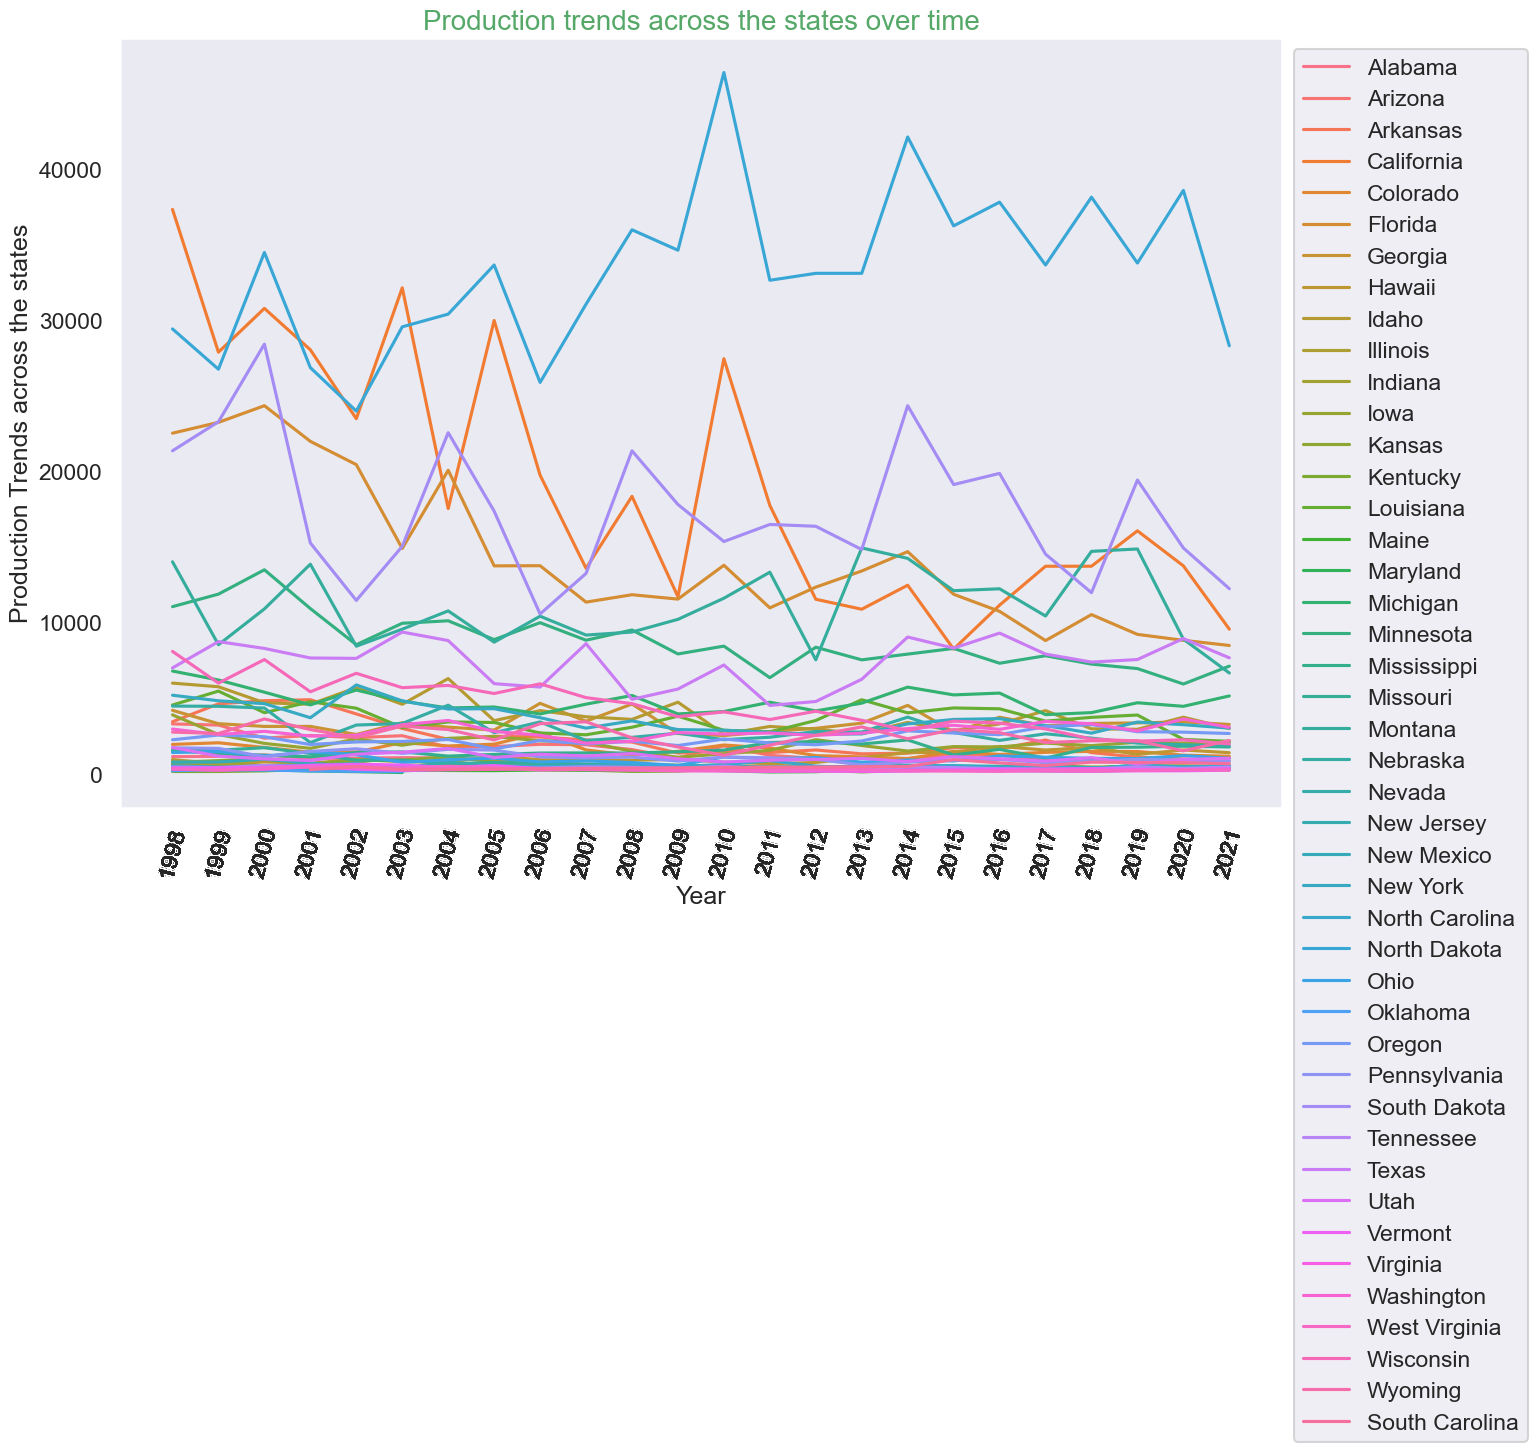

In [63]:
# ques 2
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('dark') 
sns.set_context('talk',font_scale=1,rc={'grid.linewidth':0.7}) 
sns.set_palette('Set1') 
sns.lineplot(data=honey2,x='year', y='totalprod',hue = 'State')
plt.xlabel('Year')
plt.ylabel('Production Trends across the states')
plt.legend(bbox_to_anchor=(1,1))  
plt.xticks(honey['year'],rotation=75) 
plt.title('Production trends across the states over time',color='g',size=20) 
plt.show()

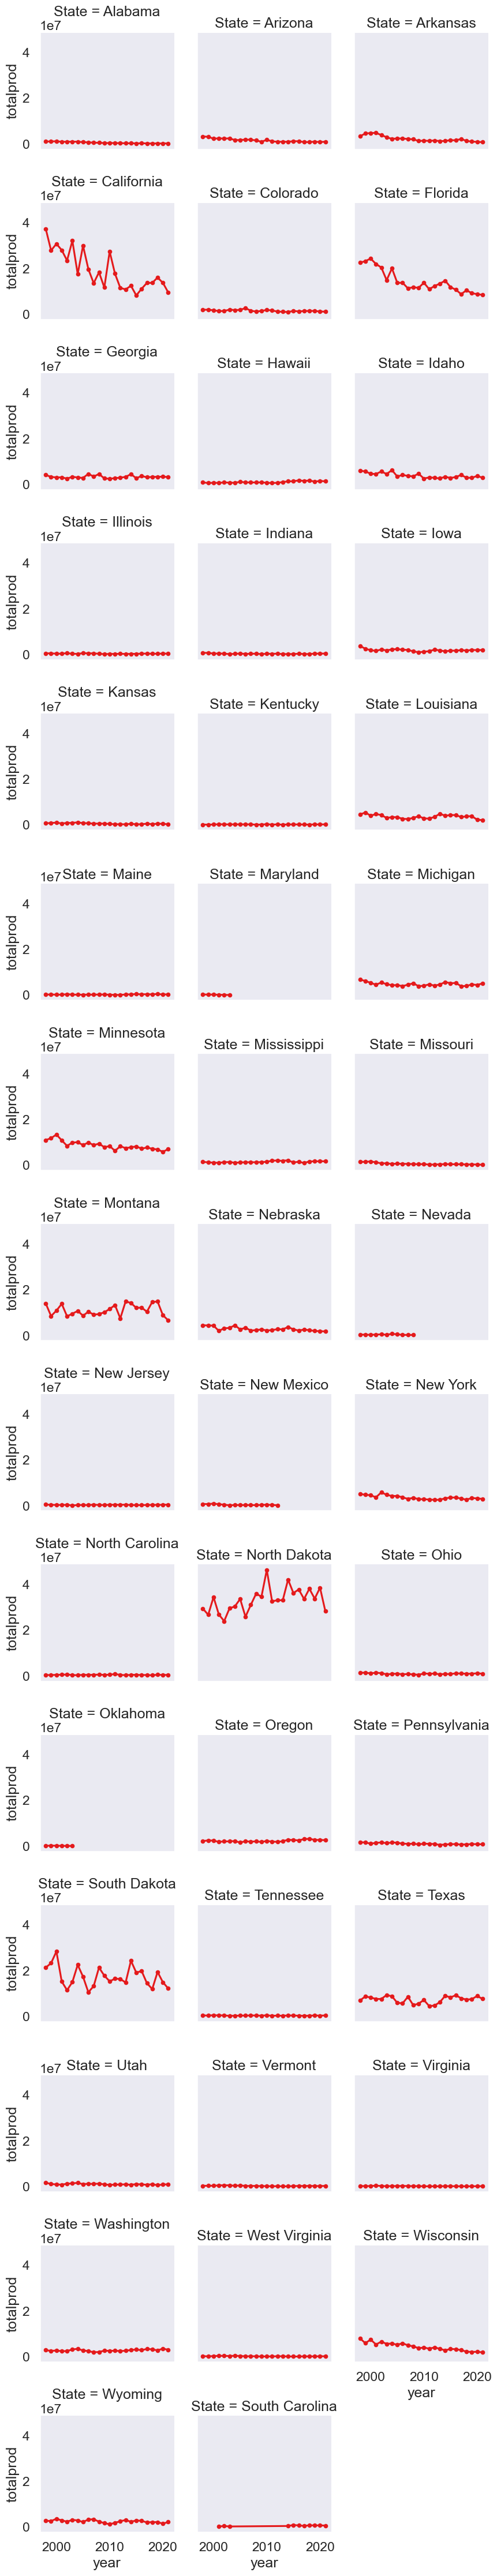

In [64]:
#method-2
g = sns.FacetGrid(honey, col="State", col_wrap=3, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")
plt.show()

<br>Que 3 .Does the data show any trends in terms of the number of honey
producing colonies and yield per colony before 2006, which was when
concern over Colony Collapse Disorder spread nationwide?

In [66]:
h_year=honey[(honey['year']<2006)].reset_index()
h_year.head(2)  # we tried performing the data analysis according to the question.

,index,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


In [67]:
h1=honey[(honey['year']<2006) & (honey['yieldpercol']) &  (honey['numcol'])]
h1.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
9,Illinois,9000.0,71,639000.0,204000.0,1.19,760000.0,1998
14,Louisiana,41000.0,111,4551000.0,865000.0,0.59,2685000.0,1998


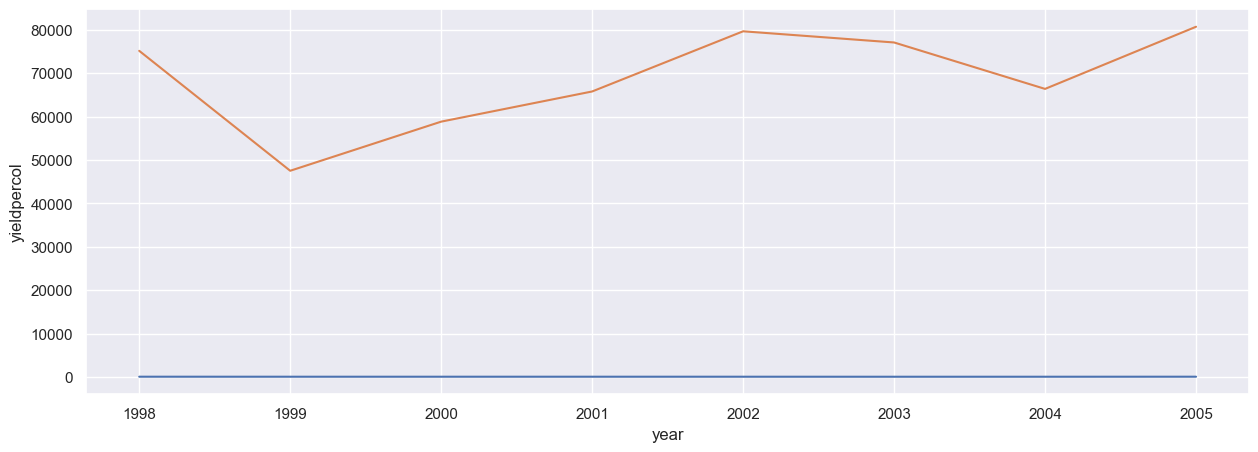

In [68]:
# Ans-3
sns.set(rc={'figure.figsize':(15,5)})   
sns.lineplot(data=h1,x='year',y='yieldpercol',ci=None)
sns.lineplot(data=h1,x='year',y='numcol',ci=None) 
plt.show()

<br>Que 4  Are there any patterns that can be observed between total honey
production and value of production every year?

In [69]:
h2=honey.groupby(['year']).sum()
h2.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0


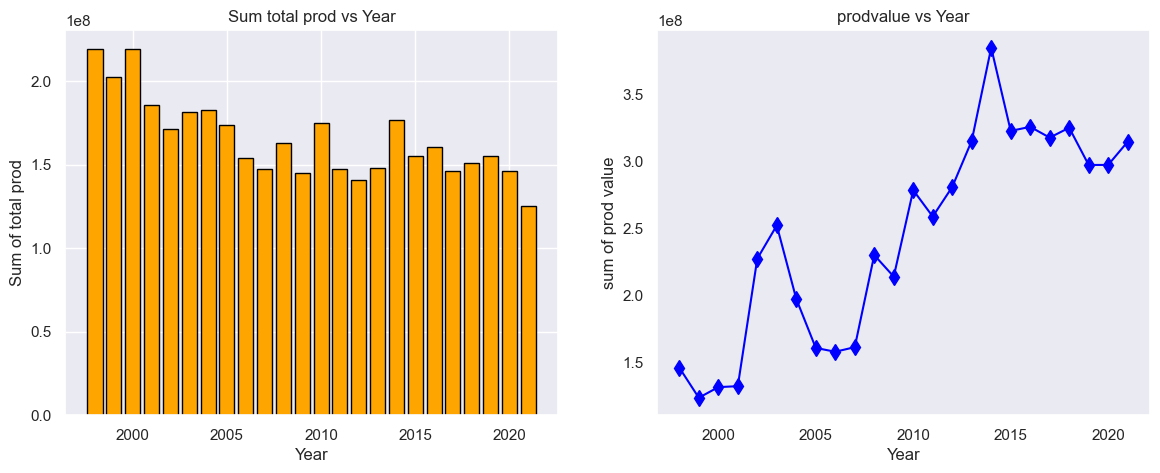

In [70]:
#Ans 4
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))  # nrows = 1, ncols =2
# ax1 is plot1
# ax2 is plot2

ax1.bar(h2.index,h2['totalprod'],color='orange',edgecolor='black')
ax1.set_title('Sum total prod vs Year')
ax1.set_ylabel('Sum of total prod')
ax1.set_xlabel('Year')

ax2.plot(h2.index,h2['prodvalue'],color='blue',marker='d',markersize=8)
ax2.set_title('prodvalue vs Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('sum of prod value')      
ax2.grid()

plt.show()

<br>Que 5- How has the value of production ,which in some sense could be tied to demand,changed every year?

In [71]:
honey['consumption']=honey['totalprod'] - honey['stocks']
honey.head(2)

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,consumption
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,977000.0
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,1815000.0


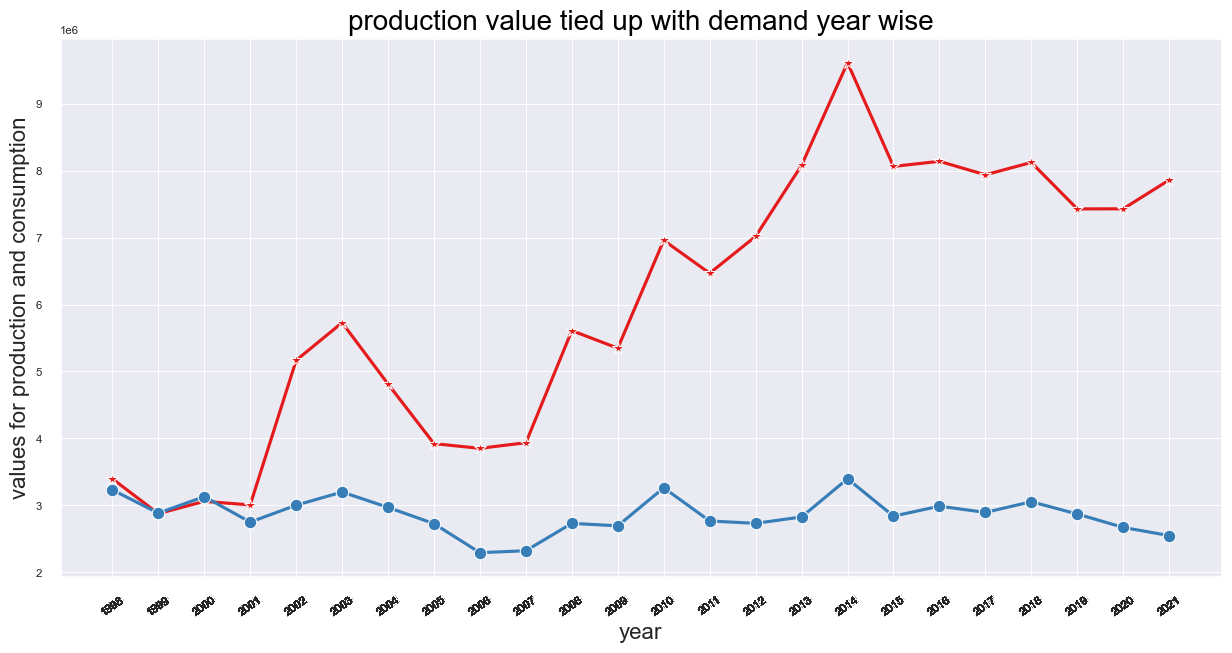

In [72]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style('darkgrid')
sns.set_context('talk',font_scale=0.5,rc={'grid.linewidth':0.7})
sns.set_palette('Set1')
sns.lineplot(data=honey,x='year',y='prodvalue',marker='*',ci=None)
sns.lineplot(data=honey,x='year',y='consumption',marker='o',ci=None)
plt.xlabel('year',size=16)
plt.ylabel('values for production and consumption',size=16)
plt.xticks(honey['year'],rotation=35)
plt.title('production value tied up with demand year wise',color='black',size=20)

plt.show()

<br>Que 6 Constructs the related plots using Seaborn and Matplot apply
customization and derive insights from the visualization.


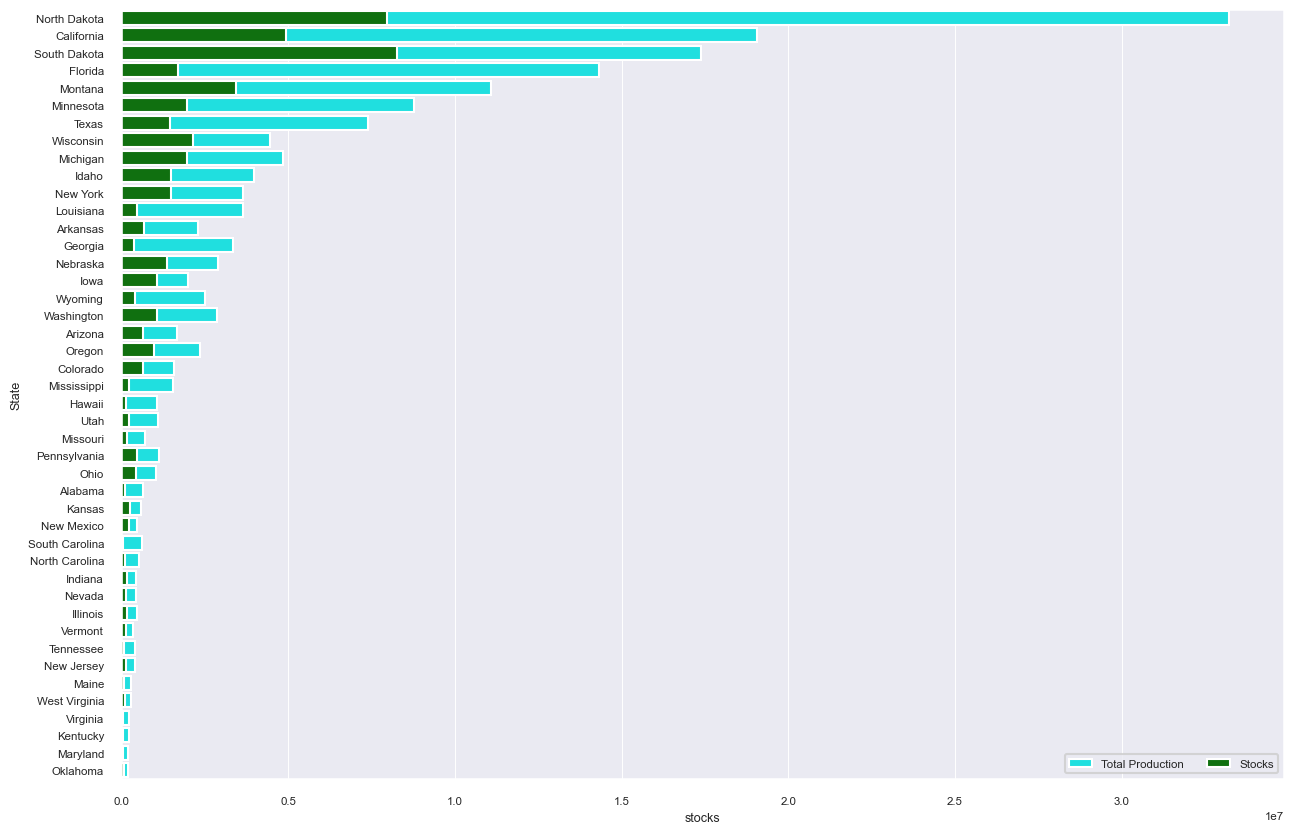

In [73]:
plt.figure(figsize = (15,10)) 
sns.barplot(x="totalprod", y="State", data=honey.sort_values("totalprod", ascending=False),label="Total Production", color="cyan", ci=None)
sns.barplot(x="stocks", y="State", data=honey.sort_values("totalprod", ascending=False),label="Stocks", color="green", ci=None)
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

### Thus, in this way we tried performing some data visulizations on the given honey data. I think this data might picked up from the local online website kaggle.